In [5]:
import torchvision

In [6]:
torchvision.__version__

'0.15.2+cu117'

In [7]:
from torchvision.io import read_image

In [8]:
from ..src.train_model import *

ImportError: attempted relative import with no known parent package

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
import torch.optim as optim
from torch.utils.data import Dataset
import cv2
import numpy as np
import pandas as pd
import os
import mlflow

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using cuda device


In [3]:
class MyImageDataset(Dataset):
    def __init__(self, annotations_file, transform=None, target_transform=None):
        self._img_labels = pd.read_csv(annotations_file)
        self._transform = transform
        self._target_transform = target_transform
        self.num_workers = 8
    
    def __len__(self):
        return len(self._img_labels)
    
    def __getitem__(self, idx):
        img_path = self._img_labels.iloc[idx,0][3:]
        image = read_image(img_path)
        label = self._img_labels.iloc[idx,1]
        if self._transform:
            image = self._transform(image)
        if self._target_transform:
            label = self._target_transform(label)
        
        return image.float(), label

In [4]:
dataset = MyImageDataset('../data/indexes/index_train.csv')
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

https://lightning.ai/docs/pytorch/latest/model/train_model_basic.html

In [6]:
net = nn.Sequential()

# net.add_module('flatten', nn.Flatten())
# net.add_module(f'lin1',nn.Linear(784,128))
# net.add_module(f'act1',nn.ReLU())
# net.add_module(f'drop1',nn.Dropout(0.2))
# net.add_module(f'lin2',nn.Linear(128,64))
# net.add_module(f'act2',nn.ReLU())
# net.add_module(f'drop2',nn.Dropout(0.2))
    
# net.add_module(f'out',nn.Linear(64,10))

net.add_module('conv_2d_1', nn.Conv2d(1, 32, kernel_size=(2,2)))
net.add_module('relu', nn.ReLU())
net.add_module('maxpool', nn.MaxPool2d(kernel_size=(2,2)))
net.add_module('flatten', nn.Flatten())
net.add_module('linear1', nn.LazyLinear(out_features=10))

net

/home/nboan/.local/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Sequential(
  (conv_2d_1): Conv2d(1, 32, kernel_size=(2, 2), stride=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): LazyLinear(in_features=0, out_features=10, bias=True)
)

In [8]:
data_loader.batch_size

1

In [125]:
optmizer = optim.SGD(net.parameters(), lr = 1e-3)

size = len(data_loader)
net.train()
for batch, (X,y) in enumerate(data_loader):
    pred = net(X)
    loss_fn = nn.CrossEntropyLoss()
    loss = loss_fn(pred, y)
    
    loss.backward()
    optmizer.step()
    optmizer.zero_grad()
    
    if batch % 2 == 0:
        loss, current = loss.item(), batch+1
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
else:
    loss, current = loss.item(), batch+1
    print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

loss: 3.850490  [    1/   12]
loss: 2.741665  [    3/   12]
loss: 1.996977  [    5/   12]
loss: 1.825573  [    7/   12]
loss: 1.548487  [    9/   12]
loss: 1.305902  [   11/   12]
loss: 1.417979  [   12/   12]


In [50]:
arr = list(train_dataloader)[0]

In [51]:
arr[0].shape

torch.Size([64, 1, 28, 28])

In [58]:
net(arr[0]).argmax(dim=1)

tensor([4, 2, 3, 3, 7, 1, 3, 4, 3, 4, 3, 2, 3, 3, 3, 4, 4, 2, 4, 3, 3, 3, 3, 4,
        3, 7, 2, 2, 3, 3, 3, 7, 3, 3, 3, 7, 7, 3, 3, 3, 6, 4, 7, 3, 2, 7, 4, 4,
        2, 7, 4, 7, 4, 6, 3, 3, 6, 7, 6, 7, 4, 3, 3, 3])

In [59]:
arr[1]

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5])

https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

In [76]:
net(input_image)

RuntimeError: mat1 and mat2 must have the same dtype

In [13]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        for n in range(N_LAYERS):
            pass

In [15]:
net = nn.Sequential()

In [17]:
net.add_module('act1',nn.ReLU())
net.add_module('linear1',nn.Linear(20,10))
net.add_module('conv1',nn.Conv2d(32,64,(3,3)))

In [18]:
print(net)

Sequential(
  (act1): ReLU()
  (linear1): Linear(in_features=20, out_features=10, bias=True)
  (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
)


In [60]:
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [43]:
data = load_digits()
img_test = data['images'][0]
arr = cv2.imread('test.png', cv2.IMREAD_UNCHANGED)

In [72]:
import os

In [73]:
os.path.join('../data/raw/images','*.jpg')

'../data/raw/images/*.jpg'

In [56]:
int("../data/raw/images/img_727_1.jpg".split('_')[-1].replace('.jpg', ''))

1

In [71]:
df_train, df_test = (
    pd.DataFrame(glob.glob('../data/raw/images/*.jpg'), columns=['file_name'])
    .assign(target = lambda x: x.file_name.apply(lambda z: int(z.split('_')[-1].replace('.jpg', ''))))
    .pipe((train_test_split),test_size=0.2, random_state=42)
)

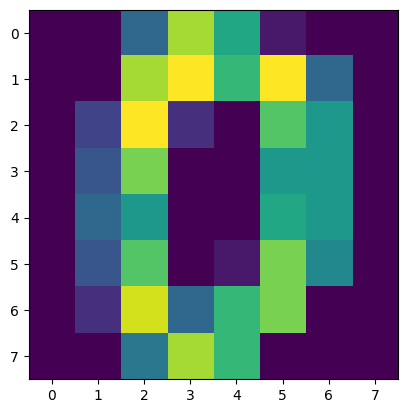

In [27]:
plt.imshow(img_test)

In [25]:
Image.fromarray(img_test, mode='L')

In [28]:
arr = cv2.imread('../data/raw/images/img_0_0.jpg')

In [30]:
arr.shape

(8, 8, 3)

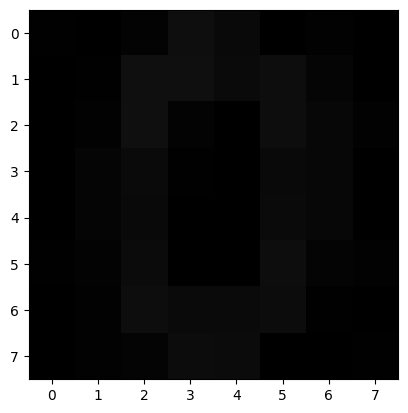

In [13]:
plt.imshow(arr, cmap='viridis')